In [1]:
import os
from PIL import Image
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

 93% 138M/149M [00:00<00:00, 219MB/s]
100% 149M/149M [00:00<00:00, 212MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/brain-tumor-mri-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [31]:
classes= {'glioma':0,'meningioma':1,'notumor':2,'pituitary':3}

In [ ]:
X = []
Y = []
for cls in classes:
    pth = '/content/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,3)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])


In [ ]:
print(len(X),len(Y))

5712 5712


In [ ]:
X = np.array(X)
Y = np.array(Y)
X_updated = X.reshape(len(X), -1)
X_updated.shape

(5712, 120000)

In [ ]:
X.shape, X_updated.shape

((5712, 200, 200, 3), (5712, 120000))

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(5712, 120000)

In [ ]:
import os
import cv2

# Function to preprocess and save images
def preprocess_and_save(input_folder, output_folder, target_size=(224, 224)):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through each image in the input folder
    for filename in os.listdir(input_folder):
        # Read the image
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)

        # Preprocess the image (e.g., resize)
        img = cv2.resize(img, target_size)

        # Save the preprocessed image to the output folder
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, img)


# Example usage
input_folder = "/content/Training/glioma"
output_folder = "/content/Training/Preprocessed/glioma"
target_size = (224, 224)  # Custom size for resizing
preprocess_and_save(input_folder, output_folder, target_size)
print("Images are preprocessed and saved")


Images are preprocessed and saved


In [ ]:
import os
import cv2

# Function to preprocess and save images
def preprocess_and_save(input_folder, output_folder, target_size=(224, 224)):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through each image in the input folder
    for filename in os.listdir(input_folder):
        # Read the image
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)

        # Preprocess the image (e.g., resize)
        img = cv2.resize(img, target_size)

        # Save the preprocessed image to the output folder
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, img)


# Example usage
input_folder = "/content/Training/meningioma"
output_folder = "/content/Training/Preprocessed/meningioma"
target_size = (224, 224)  # Custom size for resizing
preprocess_and_save(input_folder, output_folder, target_size)
print("Images are preprocessed and saved")


Images are preprocessed and saved


In [ ]:
import os
import cv2

# Function to preprocess and save images
def preprocess_and_save(input_folder, output_folder, target_size=(224, 224)):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through each image in the input folder
    for filename in os.listdir(input_folder):
        # Read the image
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)

        # Preprocess the image (e.g., resize)
        img = cv2.resize(img, target_size)

        # Save the preprocessed image to the output folder
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, img)


# Example usage
input_folder = "/content/Training/meningioma"
output_folder = "/content/Training/Preprocessed/meningioma"
target_size = (224, 224)  # Custom size for resizing
preprocess_and_save(input_folder, output_folder, target_size)
print("Images are preprocessed and saved")


Images are preprocessed and saved


In [ ]:
import os

def delete_images(directory):
    # Get a list of all files in the directory
    files = os.listdir(directory)

    # Iterate over each file and delete if it's an image file
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png') or file.endswith('.jpeg'):
            os.remove(os.path.join(directory, file))

# Directory containing the images you want to delete
directory_to_delete_from = '/content/Training/Augumented/glioma'

# Call the function to delete images from the directory
delete_images(directory_to_delete_from)

print("Images deleted from", directory_to_delete_from)


Images deleted from /content/Training/Augumented/glioma


After Images Before Preprocessing


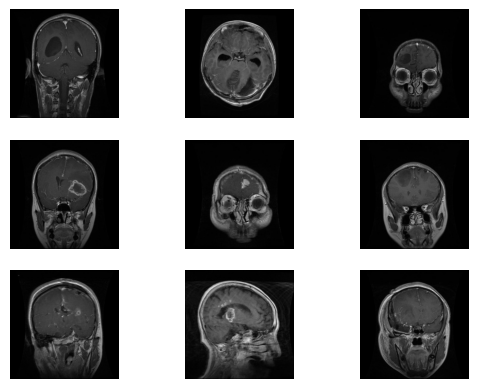

In [ ]:
import os

# Define the directory path containing images with no tumors
directory = '/content/Training/Preprocessed/glioma'

# Get a list of all image files in the directory
no_tumor_images = [os.path.join(directory, f) for f in os.listdir(directory)]

# Now, you can use this list to read and process the images
print("After Images Before Preprocessing")
c = 1
for i in range(9):  # Looping through indices rather than elements
    plt.subplot(3, 3, c)
    img = cv2.imread(no_tumor_images[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator

# Define the paths
input_folder = "/content/Training/glioma"
output_folder = "/content/drive/MyDrive/New/glioma"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Define the data generator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotate images randomly up to 20 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10%
    height_shift_range=0.1, # Shift images vertically by up to 10%
    shear_range=0.2,        # Shear transformations with a shear intensity of 0.2
    zoom_range=0.2,         # Zoom in/out on images by up to 20%
    horizontal_flip=True,   # Flip images horizontally
    fill_mode='nearest'     # Fill in newly created pixels using the nearest available pixel
)

# Iterate through each image in the input folder
for filename in os.listdir(input_folder):
    img_path = os.path.join(input_folder, filename)
    img = cv2.imread(img_path)  # Load image using OpenCV

    # Preprocess image as needed (e.g., resize, normalize, etc.)
    # For example, resize the image to a specific size
    img = cv2.resize(img, (224, 224))  # Resize to 224x224 pixels

    # Reshape the image to (1, height, width, channels) for the flow method
    img = img.reshape((1,) + img.shape)

    # Generate augmented images
    for i, batch in enumerate(datagen.flow(img, batch_size=1, save_to_dir=output_folder, save_prefix='aug_', save_format='jpg')):
        if i >= 5:  # Generate 5 augmented images per original image
            break  # Stop augmentation after 5 images



In [22]:
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator

# Define the paths
input_folder = "//content/Training/meningioma"
output_folder = "/content/drive/MyDrive/New/meningioma"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Define the data generator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotate images randomly up to 20 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10%
    height_shift_range=0.1, # Shift images vertically by up to 10%
    shear_range=0.2,        # Shear transformations with a shear intensity of 0.2
    zoom_range=0.2,         # Zoom in/out on images by up to 20%
    horizontal_flip=True,   # Flip images horizontally
    fill_mode='nearest'     # Fill in newly created pixels using the nearest available pixel
)

# Iterate through each image in the input folder
for filename in os.listdir(input_folder):
    img_path = os.path.join(input_folder, filename)
    img = cv2.imread(img_path)  # Load image using OpenCV

    # Preprocess image as needed (e.g., resize, normalize, etc.)
    # For example, resize the image to a specific size
    img = cv2.resize(img, (224, 224))  # Resize to 224x224 pixels

    # Reshape the image to (1, height, width, channels) for the flow method
    img = img.reshape((1,) + img.shape)

    # Generate augmented images
    for i, batch in enumerate(datagen.flow(img, batch_size=1, save_to_dir=output_folder, save_prefix='aug_', save_format='jpg')):
        if i >= 5:  # Generate 5 augmented images per original image
            break  # Stop augmentation after 5 images
print("Images are augumented")


Images are augumented


In [23]:
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator

# Define the paths
input_folder = "/content/Training/notumor"
output_folder = "/content/drive/MyDrive/New/notumor"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Define the data generator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotate images randomly up to 20 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10%
    height_shift_range=0.1, # Shift images vertically by up to 10%
    shear_range=0.2,        # Shear transformations with a shear intensity of 0.2
    zoom_range=0.2,         # Zoom in/out on images by up to 20%
    horizontal_flip=True,   # Flip images horizontally
    fill_mode='nearest'     # Fill in newly created pixels using the nearest available pixel
)

# Iterate through each image in the input folder
for filename in os.listdir(input_folder):
    img_path = os.path.join(input_folder, filename)
    img = cv2.imread(img_path)  # Load image using OpenCV

    # Preprocess image as needed (e.g., resize, normalize, etc.)
    # For example, resize the image to a specific size
    img = cv2.resize(img, (224, 224))  # Resize to 224x224 pixels

    # Reshape the image to (1, height, width, channels) for the flow method
    img = img.reshape((1,) + img.shape)

    # Generate augmented images
    for i, batch in enumerate(datagen.flow(img, batch_size=1, save_to_dir=output_folder, save_prefix='aug_', save_format='jpg')):
        if i >= 5:  # Generate 5 augmented images per original image
            break  # Stop augmentation after 5 images



In [24]:
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator

# Define the paths
input_folder = "/content/Training/pituitary"
output_folder = "/content/drive/MyDrive/New/pituitary"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Define the data generator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotate images randomly up to 20 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10%
    height_shift_range=0.1, # Shift images vertically by up to 10%
    shear_range=0.2,        # Shear transformations with a shear intensity of 0.2
    zoom_range=0.2,         # Zoom in/out on images by up to 20%
    horizontal_flip=True,   # Flip images horizontally
    fill_mode='nearest'     # Fill in newly created pixels using the nearest available pixel
)

# Iterate through each image in the input folder
for filename in os.listdir(input_folder):
    img_path = os.path.join(input_folder, filename)
    img = cv2.imread(img_path)  # Load image using OpenCV

    # Preprocess image as needed (e.g., resize, normalize, etc.)
    # For example, resize the image to a specific size
    img = cv2.resize(img, (224, 224))  # Resize to 224x224 pixels

    # Reshape the image to (1, height, width, channels) for the flow method
    img = img.reshape((1,) + img.shape)

    # Generate augmented images
    for i, batch in enumerate(datagen.flow(img, batch_size=1, save_to_dir=output_folder, save_prefix='aug_', save_format='jpg')):
        if i >= 5:  # Generate 5 augmented images per original image
            break  # Stop augmentation after 5 images



Images after Augumentation


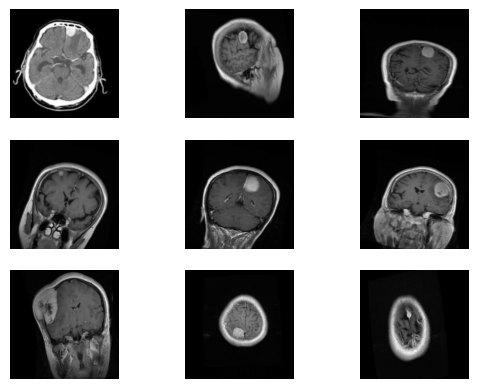

In [ ]:
import os

# Define the directory path containing images with no tumors
directory = '/content/Training/Augumented/meningioma'

# Get a list of all image files in the directory
augumented_meningioma_tumor_images = [os.path.join(directory, f) for f in os.listdir(directory)]

# Now, you can use this list to read and process the images
print("Images after Augumentation")
c = 1
for i in range(9):  # Looping through indices rather than elements
    plt.subplot(3, 3, c)
    img = cv2.imread(augumented_meningioma_tumor_images[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

In [ ]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import normalize, to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

# Define constants
image_directory = "/content/Training/Augumented/"
glioma_tumor_images = os.listdir(os.path.join(image_directory, 'glioma'))
meningioma_tumor_images = os.listdir(os.path.join(image_directory, 'meningioma'))
no_tumor_images = os.listdir(os.path.join(image_directory, 'notumor'))
pituitary_tumor_images = os.listdir(os.path.join(image_directory, 'pituitary'))
INPUT_SIZE = 64

# Initialize lists to store images and labels
dataset = []
label = []

# Load and preprocess images for glioma tumors
for img_name in glioma_tumor_images:
    img_path = os.path.join(image_directory, 'glioma', img_name)
    img = cv2.imread(img_path)  # Read image without grayscale (assuming the images are already grayscale)
    img = cv2.resize(img, (INPUT_SIZE, INPUT_SIZE))
    dataset.append(img)
    label.append(0)  # glioma Tumor present

# Load and preprocess images for meningioma tumors
for img_name in meningioma_tumor_images:
    img_path = os.path.join(image_directory, 'meningioma', img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (INPUT_SIZE, INPUT_SIZE))
    dataset.append(img)
    label.append(1)  # meningioma tumor

# Load and preprocess images for no tumors
for img_name in no_tumor_images:
    img_path = os.path.join(image_directory, 'notumor', img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (INPUT_SIZE, INPUT_SIZE))
    dataset.append(img)
    label.append(2)  # no tumor

# Load and preprocess images for pituitary tumors
for img_name in pituitary_tumor_images:
    img_path = os.path.join(image_directory, 'pituitary', img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (INPUT_SIZE, INPUT_SIZE))
    dataset.append(img)
    label.append(3)  # pituitary tumor

# Convert lists to numpy arrays
dataset = np.array(dataset)
label = np.array(label)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)

# Normalize input features and convert labels to categorical format
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)
y_train = to_categorical(y_train , num_classes=4)  # Subtract 1 to make labels start from 0
y_test = to_categorical(y_test , num_classes=4)

# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))  # Using softmax for multi-class classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=16, verbose=1, epochs=10,
                    validation_data=(x_test, y_test))

# Save the trained model
model.save('BrainTumorUpdatedClassifierModel.keras')


Epoch 1/10
1147/1147 [==============================] - 142s 122ms/step - loss: 0.9015 - accuracy: 0.6070 - val_loss: 0.6197 - val_accuracy: 0.7426
Epoch 2/10
1147/1147 [==============================] - 133s 116ms/step - loss: 0.6103 - accuracy: 0.7466 - val_loss: 0.4492 - val_accuracy: 0.8215
Epoch 3/10
1147/1147 [==============================] - 133s 116ms/step - loss: 0.4411 - accuracy: 0.8248 - val_loss: 0.3873 - val_accuracy: 0.8429
Epoch 4/10
1147/1147 [==============================] - 145s 126ms/step - loss: 0.3258 - accuracy: 0.8773 - val_loss: 0.3275 - val_accuracy: 0.8747
Epoch 5/10
1147/1147 [==============================] - 133s 116ms/step - loss: 0.2478 - accuracy: 0.9069 - val_loss: 0.2439 - val_accuracy: 0.9082
Epoch 6/10
1147/1147 [==============================] - 129s 113ms/step - loss: 0.2042 - accuracy: 0.9237 - val_loss: 0.2224 - val_accuracy: 0.9150
Epoch 7/10
1147/1147 [==============================] - 131s 114ms/step - loss: 0.1601 - accuracy: 0.9407 - val_

In [26]:
train_data_path = '/content/Training'
filepaths =[]
labels = []
folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
train_df = pd.concat([Fseries , Lseries] , axis = 1)

In [ ]:
train_df

,filepaths,label
0,/content/Training/Preprocessed/glioma,Preprocessed
1,/content/Training/Preprocessed/.ipynb_checkpoints,Preprocessed
2,/content/Training/Preprocessed/meningioma,Preprocessed
3,/content/Training/pituitary/Tr-pi_1446.jpg,pituitary
4,/content/Training/pituitary/Tr-pi_0431.jpg,pituitary
...,...,...
5714,/content/Training/meningioma/Tr-me_0764.jpg,meningioma
5715,/content/Training/meningioma/Tr-me_0270.jpg,meningioma
5716,/content/Training/meningioma/Tr-me_1090.jpg,meningioma
5717,/content/Training/meningioma/Tr-me_0434.jpg,meningioma


In [27]:
test_data_path = '/content/Testing'

filepaths =[]
labels = []
folds = os.listdir(test_data_path)

for fold in folds:
    f_path = os.path.join(test_data_path , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
test_df = pd.concat([Fseries , Lseries] , axis = 1)

In [ ]:
test_df

,filepaths,label
0,/content/Testing/pituitary/Te-pi_0092.jpg,pituitary
1,/content/Testing/pituitary/Te-pi_0223.jpg,pituitary
2,/content/Testing/pituitary/Te-pi_0103.jpg,pituitary
3,/content/Testing/pituitary/Te-pi_0104.jpg,pituitary
4,/content/Testing/pituitary/Te-pi_0072.jpg,pituitary
...,...,...
1306,/content/Testing/meningioma/Te-me_0073.jpg,meningioma
1307,/content/Testing/meningioma/Te-me_0212.jpg,meningioma
1308,/content/Testing/meningioma/Te-me_0201.jpg,meningioma
1309,/content/Testing/meningioma/Te-me_0245.jpg,meningioma


In [28]:
valid , test = train_test_split(test_df , train_size = 0.5 , shuffle = True , random_state= 42)

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers
img_size = (224 ,244)
batch_size = 16

tr_gen = ImageDataGenerator()
ts_gen= ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_df , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size =batch_size)
valid_gen = ts_gen.flow_from_dataframe(valid , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                       class_mode = 'categorical',color_mode = 'rgb' , shuffle= True, batch_size = batch_size)
test_gen = ts_gen.flow_from_dataframe(test , x_col= 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode= 'rgb' , shuffle = False , batch_size = batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 4 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


In [47]:
img_shape = (img_size[0] , img_size[1] , 3)
num_class = len(classes)
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top = False , weights = 'imagenet',input_shape = img_shape, pooling= 'max')
model = Sequential([
    base_model,
    BatchNormalization(axis= -1 , momentum= 0.99 , epsilon= 0.001),
    Dense(256, kernel_regularizer = regularizers.l2(l= 0.016) , activity_regularizer = regularizers.l1(0.006),bias_regularizer= regularizers.l1(0.006) , activation = 'relu'),
    Dropout(rate= 0.4 , seed = 75),
    Dense(num_class , activation = 'softmax')
])
model.compile(Adamax(learning_rate = 0.001) , loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.save("BrainTumor.keras")
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization_4 (Bat  (None, 1536)              6144      
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 256)               393472    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 11184179 (42.66 MB)
Trainable params: 11

In [48]:
Epochs = 10
history = model.fit(x= train_gen , epochs = Epochs, verbose = 1, validation_data= valid_gen,validation_steps = None , shuffle = False)
# Train the model

# Save the trained model
model.save("trained_model.keras")


Epoch 1/10
357/357 [==============================] - 155s 299ms/step - loss: 5.6962 - accuracy: 0.8669 - val_loss: 3.8410 - val_accuracy: 0.9282
Epoch 2/10
357/357 [==============================] - 104s 291ms/step - loss: 2.6324 - accuracy: 0.9585 - val_loss: 1.7620 - val_accuracy: 0.9817
Epoch 3/10
357/357 [==============================] - 104s 292ms/step - loss: 1.3002 - accuracy: 0.9769 - val_loss: 0.8559 - val_accuracy: 0.9878
Epoch 4/10
357/357 [==============================] - 104s 291ms/step - loss: 0.6632 - accuracy: 0.9848 - val_loss: 0.4397 - val_accuracy: 0.9939
Epoch 5/10
357/357 [==============================] - 107s 299ms/step - loss: 0.3772 - accuracy: 0.9902 - val_loss: 0.2777 - val_accuracy: 0.9939
Epoch 6/10
357/357 [==============================] - 106s 298ms/step - loss: 0.2676 - accuracy: 0.9893 - val_loss: 0.2084 - val_accuracy: 0.9954
Epoch 7/10
357/357 [==============================] - 107s 298ms/step - loss: 0.2149 - accuracy: 0.9912 - val_loss: 0.2196 -

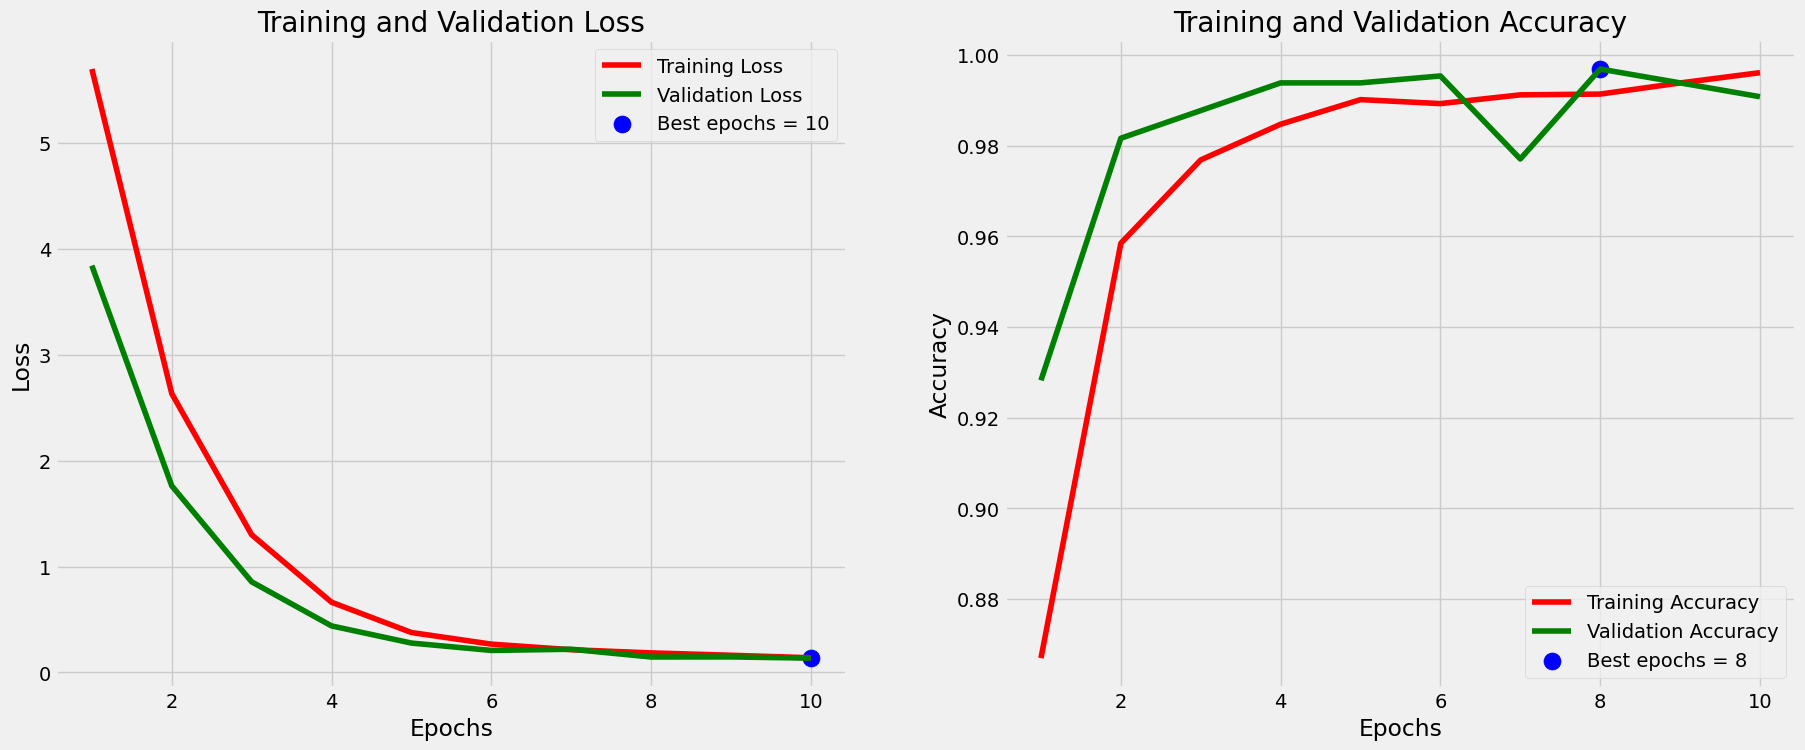

In [49]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

#Training history

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show();

In [50]:
train_score = model.evaluate(train_gen , steps =16 , verbose = 1)
valid_score = model.evaluate(valid_gen , steps = 16 , verbose = 1)
test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

16/16 [==============================] - 1s 67ms/step - loss: 0.1994 - accuracy: 0.9844
Train Loss:  0.16589879989624023
Train Accuracy:  0.9921875
--------------------
Validation Loss:  0.14804615080356598
Validation Accuracy:  0.98046875
--------------------
Test Loss:  0.1994471698999405
Test Accuracy:  0.984375


In [51]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds , axis = 1)

<ipython-input-51-9b4dfe328b39>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_gen)


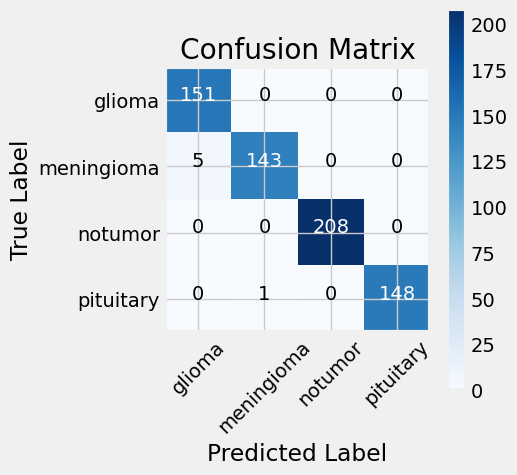

In [52]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

g_dict = test_gen.class_indices
classes = list(g_dict.keys())
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize=(5, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()


144/144 [==============================] - 9s 57ms/step


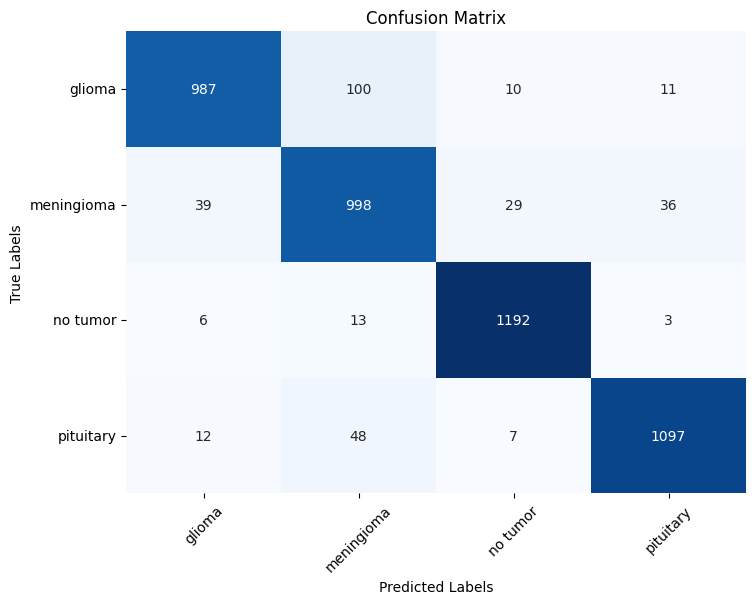

Model Accuracy: 0.9315605928509154


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Convert true labels to class indices
y_true_classes = np.argmax(y_test, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(4) + 0.5, labels=['glioma', 'meningioma', 'no tumor', 'pituitary'], rotation=45)
plt.yticks(ticks=np.arange(4) + 0.5, labels=['glioma', 'meningioma', 'no tumor', 'pituitary'], rotation=0)
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Model Accuracy:", accuracy)


In [ ]:
import cv2
from keras.models import load_model
from PIL import Image
import numpy as np

# Load the trained model
model = load_model('BrainTumorUpdatedClassifierModel.keras')

# Define the class labels
classes = {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

# Load and preprocess the image
image = cv2.imread('/content/Testing/glioma/Te-glTr_0000.jpg')
img = Image.fromarray(image)
img = img.resize((64, 64))  # Resize the image to match the model's input shape
img = np.array(img) / 255.0  # Normalize the image

# Expand dimensions to match the model's input shape
input_img = np.expand_dims(img, axis=0)

# Predict probabilities for each class
probabilities = model.predict(input_img)

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(probabilities)

# Get the predicted class label
predicted_class = list(classes.keys())[predicted_class_index]

print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 333ms/step
Predicted class: glioma_tumor


1/1 [==============================] - 0s 324ms/step
pituitary_tumor
1/1 [==============================] - 0s 112ms/step
pituitary_tumor
1/1 [==============================] - 0s 43ms/step
pituitary_tumor
1/1 [==============================] - 0s 42ms/step
pituitary_tumor
1/1 [==============================] - 0s 41ms/step
pituitary_tumor
1/1 [==============================] - 0s 41ms/step
meningioma_tumor
1/1 [==============================] - 0s 41ms/step
pituitary_tumor
1/1 [==============================] - 0s 57ms/step
pituitary_tumor
1/1 [==============================] - 0s 58ms/step
no_tumor


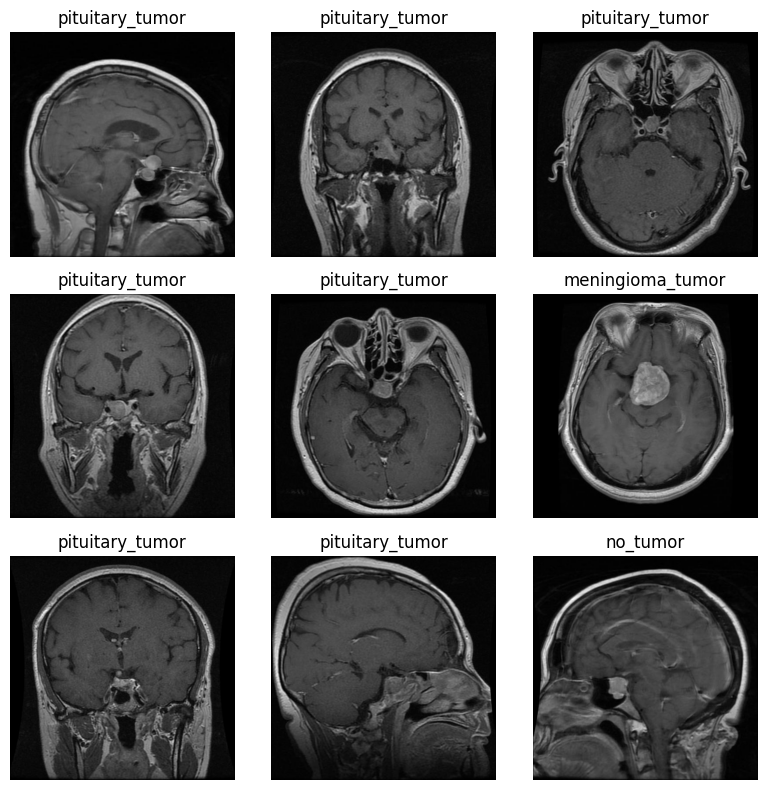

In [ ]:
import cv2
import os
import numpy as np
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('BrainTumorUpdatedClassifierModel.keras')

# Function to get class label
def get_class_label(prediction):
    classes = {0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}
    return classes[prediction]

# Function to preprocess an image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image from path: {image_path}")
        return None
    img = cv2.resize(image, (64, 64))  # Resize to match the model's input shape
    img = img / 255.0   # Normalize the image
    return img

# List of image paths
image_paths = ['/content/Testing/pituitary/' + f for f in os.listdir('/content/Testing/pituitary')[7:16]]

# Display images with predicted class labels
plt.figure(figsize=(8, 8))
for i, image_path in enumerate(image_paths):
    plt.subplot(3, 3, i+1)

    # Preprocess image and predict class label
    input_img = preprocess_image(image_path)
    if input_img is not None:
        input_img = np.expand_dims(input_img, axis=0)  # Add batch dimension
        probabilities = model.predict(input_img)
        predicted_class_index = np.argmax(probabilities)
        predicted_class_label = get_class_label(predicted_class_index)
        print(predicted_class_label)

        # Display image with label
        image = cv2.imread(image_path)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(predicted_class_label)
        plt.axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 157ms/step
no_tumor
1/1 [==============================] - 0s 39ms/step
glioma_tumor
1/1 [==============================] - 0s 38ms/step
glioma_tumor
1/1 [==============================] - 0s 38ms/step
glioma_tumor
1/1 [==============================] - 0s 25ms/step
no_tumor
1/1 [==============================] - 0s 27ms/step
no_tumor
1/1 [==============================] - 0s 25ms/step
meningioma_tumor
1/1 [==============================] - 0s 24ms/step
glioma_tumor
1/1 [==============================] - 0s 27ms/step
meningioma_tumor


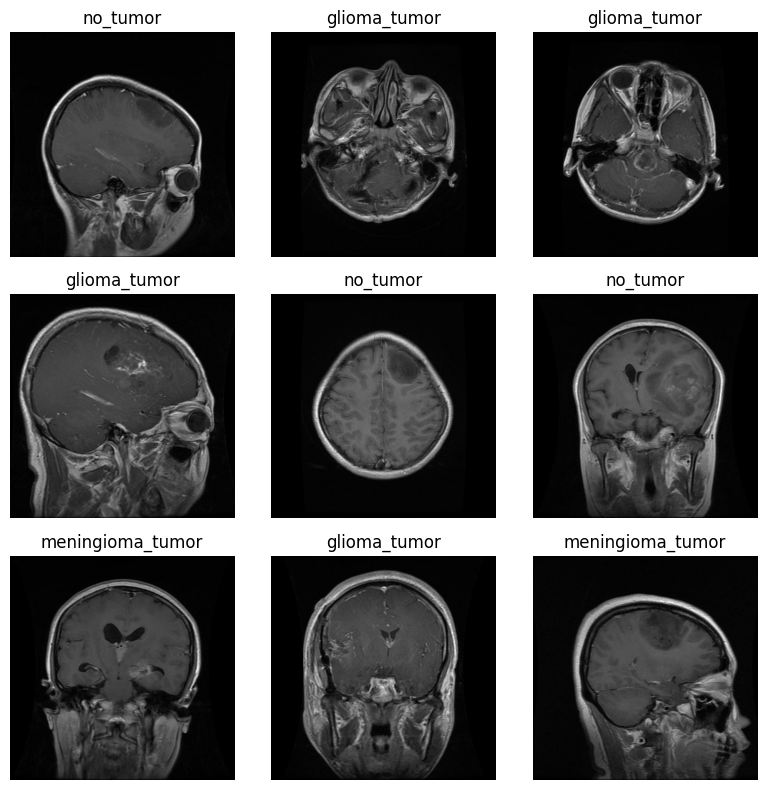

In [ ]:
import cv2
import os
import numpy as np
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('BrainTumorUpdatedClassifierModel.keras')

# Function to get class label
def get_class_label(prediction):
    classes = {0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}
    return classes[prediction]

# Function to preprocess an image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image from path: {image_path}")
        return None
    img = cv2.resize(image, (64, 64))  # Resize to match the model's input shape
    img = img / 255.0   # Normalize the image
    return img

# List of image paths
image_paths = ['/content/Testing/glioma/' + f for f in os.listdir('/content/Testing/glioma')[7:16]]

# Display images with predicted class labels
plt.figure(figsize=(8, 8))
for i, image_path in enumerate(image_paths):
    plt.subplot(3, 3, i+1)

    # Preprocess image and predict class label
    input_img = preprocess_image(image_path)
    if input_img is not None:
        input_img = np.expand_dims(input_img, axis=0)  # Add batch dimension
        probabilities = model.predict(input_img)
        predicted_class_index = np.argmax(probabilities)
        predicted_class_label = get_class_label(predicted_class_index)
        print(predicted_class_label)

        # Display image with label
        image = cv2.imread(image_path)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(predicted_class_label)
        plt.axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 93ms/step
meningioma_tumor
1/1 [==============================] - 0s 23ms/step
meningioma_tumor
1/1 [==============================] - 0s 24ms/step
meningioma_tumor
1/1 [==============================] - 0s 26ms/step
meningioma_tumor
1/1 [==============================] - 0s 28ms/step
meningioma_tumor
1/1 [==============================] - 0s 41ms/step
meningioma_tumor
1/1 [==============================] - 0s 29ms/step
meningioma_tumor
1/1 [==============================] - 0s 23ms/step
no_tumor
1/1 [==============================] - 0s 25ms/step
meningioma_tumor


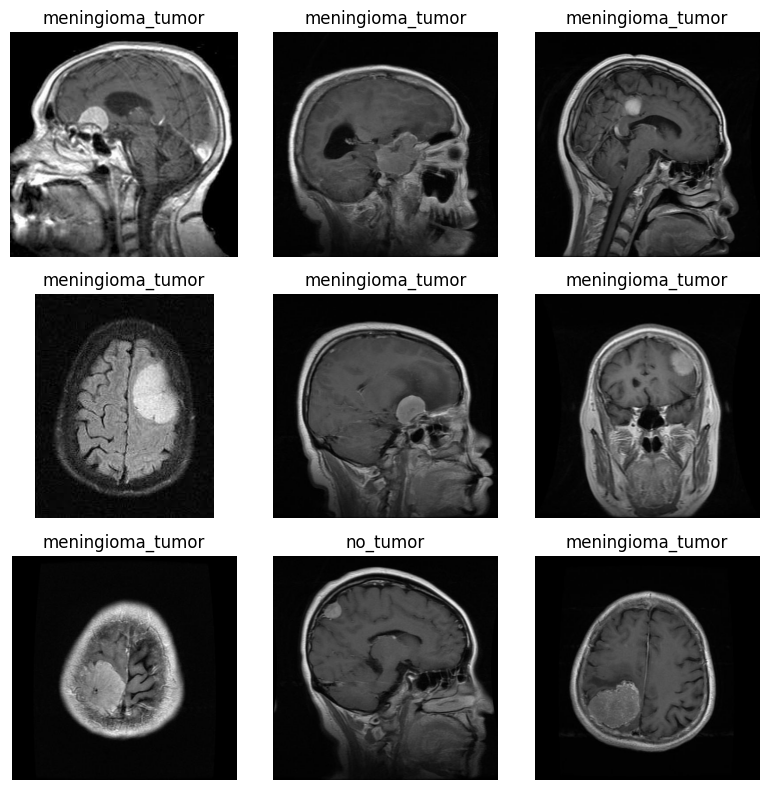

In [ ]:
import cv2
import os
import numpy as np
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('BrainTumorUpdatedClassifierModel.keras')

# Function to get class label
def get_class_label(prediction):
    classes = {0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}
    return classes[prediction]

# Function to preprocess an image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image from path: {image_path}")
        return None
    img = cv2.resize(image, (64, 64))  # Resize to match the model's input shape
    img = img / 255.0   # Normalize the image
    return img

# List of image paths
image_paths = ['/content/Testing/meningioma/' + f for f in os.listdir('/content/Testing/meningioma')[7:16]]

# Display images with predicted class labels
plt.figure(figsize=(8, 8))
for i, image_path in enumerate(image_paths):
    plt.subplot(3, 3, i+1)

    # Preprocess image and predict class label
    input_img = preprocess_image(image_path)
    if input_img is not None:
        input_img = np.expand_dims(input_img, axis=0)  # Add batch dimension
        probabilities = model.predict(input_img)
        predicted_class_index = np.argmax(probabilities)
        predicted_class_label = get_class_label(predicted_class_index)
        print(predicted_class_label)

        # Display image with label
        image = cv2.imread(image_path)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(predicted_class_label)
        plt.axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 92ms/step
no_tumor
1/1 [==============================] - 0s 24ms/step
no_tumor
1/1 [==============================] - 0s 30ms/step
no_tumor
1/1 [==============================] - 0s 26ms/step
no_tumor
1/1 [==============================] - 0s 25ms/step
no_tumor
1/1 [==============================] - 0s 25ms/step
no_tumor
1/1 [==============================] - 0s 23ms/step
no_tumor
1/1 [==============================] - 0s 27ms/step
no_tumor
1/1 [==============================] - 0s 26ms/step
no_tumor


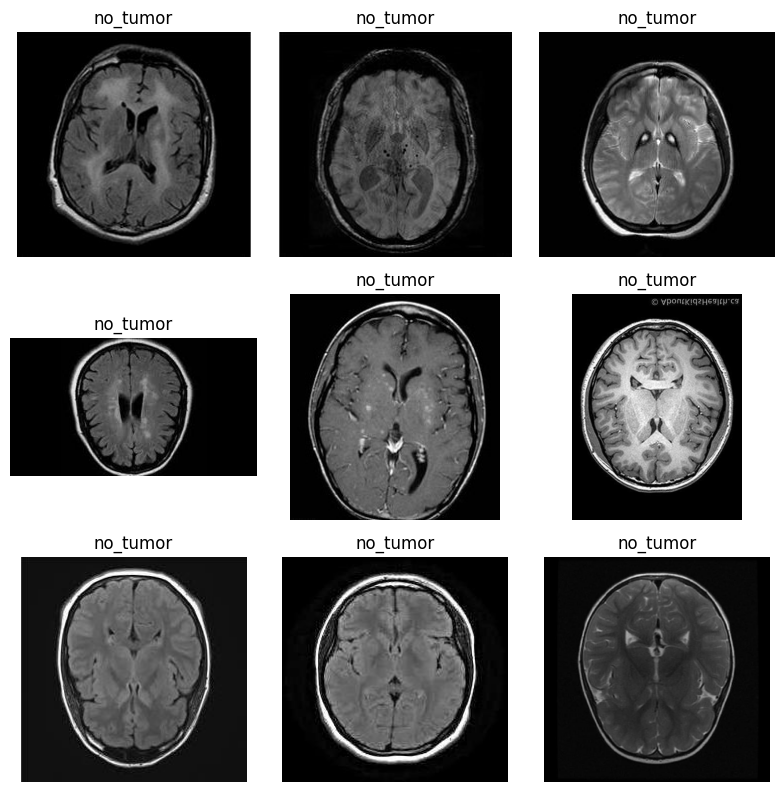

In [ ]:
import cv2
import os
import numpy as np
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('BrainTumorUpdatedClassifierModel.keras')

# Function to get class label
def get_class_label(prediction):
    classes = {0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}
    return classes[prediction]

# Function to preprocess an image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image from path: {image_path}")
        return None
    img = cv2.resize(image, (64, 64))  # Resize to match the model's input shape
    img = img / 255.0   # Normalize the image
    return img

# List of image paths
image_paths = ['/content/Testing/notumor/' + f for f in os.listdir('/content/Testing/notumor')[7:16]]

# Display images with predicted class labels
plt.figure(figsize=(8, 8))
for i, image_path in enumerate(image_paths):
    plt.subplot(3, 3, i+1)

    # Preprocess image and predict class label
    input_img = preprocess_image(image_path)
    if input_img is not None:
        input_img = np.expand_dims(input_img, axis=0)  # Add batch dimension
        probabilities = model.predict(input_img)
        predicted_class_index = np.argmax(probabilities)
        predicted_class_label = get_class_label(predicted_class_index)
        print(predicted_class_label)

        # Display image with label
        image = cv2.imread(image_path)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(predicted_class_label)
        plt.axis('off')

plt.tight_layout()
plt.show()
